In [1]:
import pandas as pd
import scanpy as sc
import numpy as np

In [4]:
adata = (sc.read_csv("BBC_CD8_post_yes.csv", delimiter =",", first_column_names=True))

In [16]:
meta = pd.read_csv("BBC_meta.csv", delimiter =",", index_col=0)

In [17]:
meta

orig.ident  nCount_RNA  \
bcc.su001.pre.tcell_AAACCTGCAGATCGGA    bcc.su001.pre.tcell        3061   
bcc.su001.pre.tcell_AAAGATGAGACAGGCT    bcc.su001.pre.tcell        4519   
bcc.su001.pre.tcell_AAAGCAAAGAGTTGGC    bcc.su001.pre.tcell        2561   
bcc.su001.pre.tcell_AACCATGGTTATCGGT    bcc.su001.pre.tcell        4956   
bcc.su001.pre.tcell_AACTCAGTCTTAGAGC    bcc.su001.pre.tcell        3311   
...                                                     ...         ...   
bcc.su012.post.tcell_TGTGTTTGTAGATTAG  bcc.su012.post.tcell        5282   
bcc.su012.post.tcell_TTAACTCCACAGAGGT  bcc.su012.post.tcell        1793   
bcc.su012.post.tcell_TTCGAAGTCGTTACAG  bcc.su012.post.tcell        4053   
bcc.su012.post.tcell_TTCTCCTGTGGCGAAT  bcc.su012.post.tcell        3357   
bcc.su012.post.tcell_TTTACTGTCTTGCCGT  bcc.su012.post.tcell        3571   

                                       nFeature_RNA patient treatment  \
bcc.su001.pre.tcell_AAACCTGCAGATCGGA           1110   su001       pre   
bcc.su001.pre.tcell_AAAGATGAGACAGGCT           1938   su001       pre   
bcc.su001.pre.tcell_AAAGCAAAGAGTTGGC           1135   su001       pre   
bcc.su001.pre.tcell_AACCATGGTTATCGGT           1536   su001       pre   
bcc.su001.pre.tcell_AACTCAGTCTTAGAGC           1451   su001       pre   
...                                             ...     ...       ...   
bcc.su012.post.tcell_TGTGTTTGTAGATTAG          1785   su012      post   
bcc.su012.post.tcell_TTAACTCCACAGAGGT           860   su012      post   
bcc.su012.post.tcell_TTCGAAGTCGTTACAG          1618   su012      post   
bcc.su012.post.tcell_TTCTCCTGTGGCGAAT          1382   su012      post   
bcc.su012.post.tcell_TTTACTGTCTTGCCGT          1264   su012      post   

                                             sort          cluster     UMAP1  \
bcc.su001.pre.tcell_AAACCTGCAGATCGGA   CD45+ CD3+      CD4_T_cells -4.893518   
bcc.su001.pre.tcell_AAAGATGAGACAGGCT   CD45+ CD3+      CD4_T_cells  1.086987   
bcc.su001.pre.tcell_AAAGCAAAGAGTTGGC   CD45+ CD3+  CD8_mem_T_cells -8.273993   
bcc.su001.pre.tcell_AACCATGGTTATCGGT   CD45+ CD3+  CD8_mem_T_cells -6.569336   
bcc.su001.pre.tcell_AACTCAGTCTTAGAGC   CD45+ CD3+   CD8_ex_T_cells  2.634526   
...                                           ...              ...       ...   
bcc.su012.post.tcell_TGTGTTTGTAGATTAG  CD45+ CD3+  CD8_mem_T_cells -8.300099   
bcc.su012.post.tcell_TTAACTCCACAGAGGT  CD45+ CD3+  CD8_mem_T_cells -7.406570   
bcc.su012.post.tcell_TTCGAAGTCGTTACAG  CD45+ CD3+   CD8_ex_T_cells -0.199053   
bcc.su012.post.tcell_TTCTCCTGTGGCGAAT  CD45+ CD3+  CD8_mem_T_cells -6.662873   
bcc.su012.post.tcell_TTTACTGTCTTGCCGT  CD45+ CD3+  CD8_mem_T_cells -7.912083   

                                          UMAP2 Tumor.Type  ...  \
bcc.su001.pre.tcell_AAACCTGCAGATCGGA   5.544943        BCC  ...   
bcc.su001.pre.tcell_AAAGATGAGACAGGCT   9.563350        BCC  ...   
bcc.su001.pre.tcell_AAAGCAAAGAGTTGGC   3.693397        BCC  ...   
bcc.su001.pre.tcell_AACCATGGTTATCGGT   2.884158        BCC  ...   
bcc.su001.pre.tcell_AACTCAGTCTTAGAGC   1.573781        BCC  ...   
...                                         ...        ...  ...   
bcc.su012.post.tcell_TGTGTTTGTAGATTAG  1.376466        BCC  ...   
bcc.su012.post.tcell_TTAACTCCACAGAGGT  4.834411        BCC  ...   
bcc.su012.post.tcell_TTCGAAGTCGTTACAG  1.287982        BCC  ...   
bcc.su012.post.tcell_TTCTCCTGTGGCGAAT  1.164121        BCC  ...   
bcc.su012.post.tcell_TTTACTGTCTTGCCGT  3.643480        BCC  ...   

                                      seurat_clusters RNA_snn_res.1.5  \
bcc.su001.pre.tcell_AAACCTGCAGATCGGA                8               9   
bcc.su001.pre.tcell_AAAGATGAGACAGGCT                9              15   
bcc.su001.pre.tcell_AAAGCAAAGAGTTGGC                7               0   
bcc.su001.pre.tcell_AACCATGGTTATCGGT                0              10   
bcc.su001.pre.tcell_AACTCAGTCTTAGAGC                2               3   
...                                               ...             .

In [19]:
adata = adata.transpose()
adata.obs = meta

In [20]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [21]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt","ribo", "hb"], inplace=True, log1p=True, percent_top=None
)

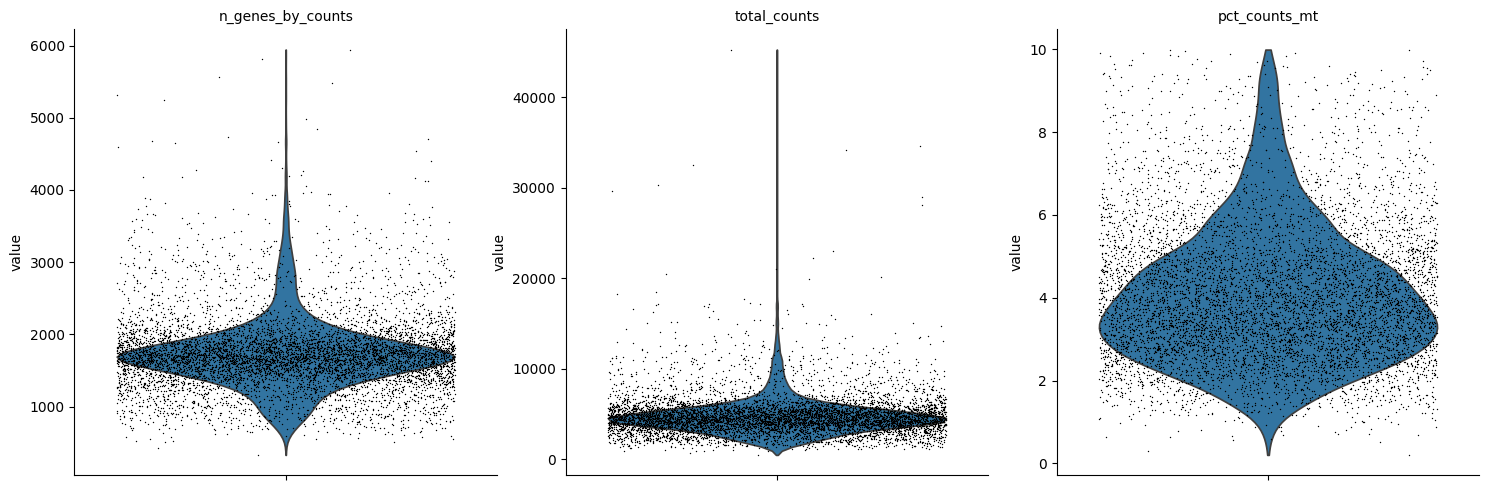

In [22]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

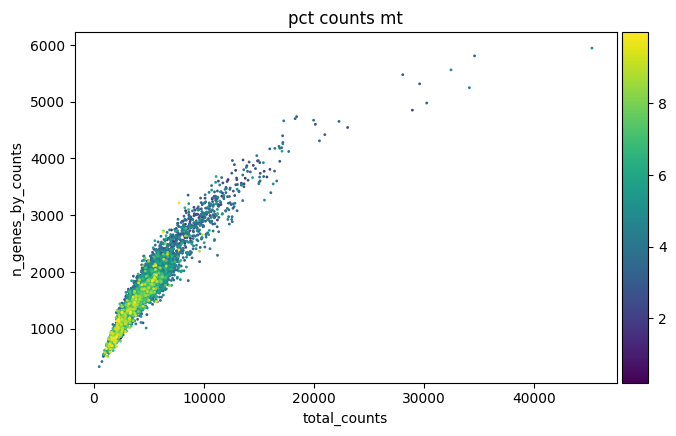

In [23]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [24]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [25]:
adata.layers["counts"] = adata.X.copy()

In [26]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [27]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

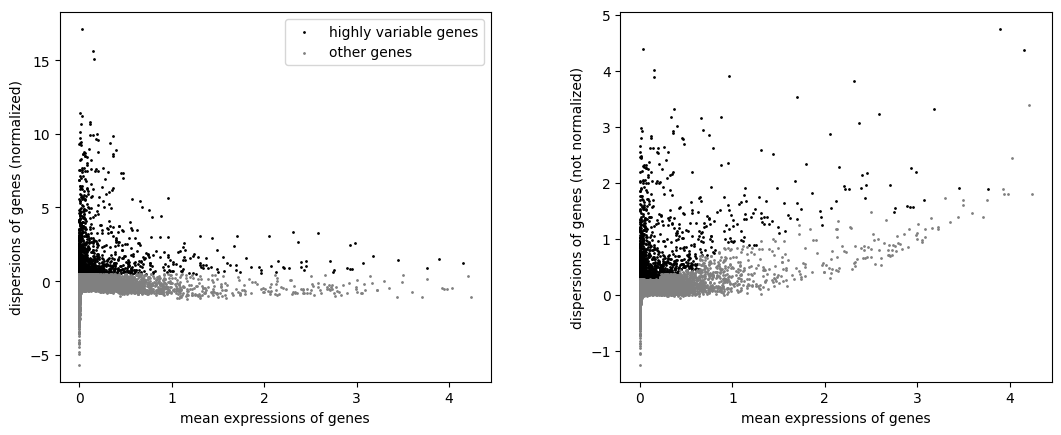

In [28]:
sc.pl.highly_variable_genes(adata)

In [29]:
sc.tl.pca(adata)

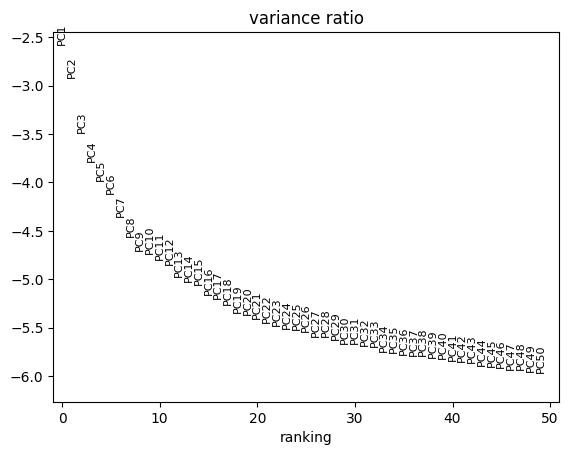

In [30]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

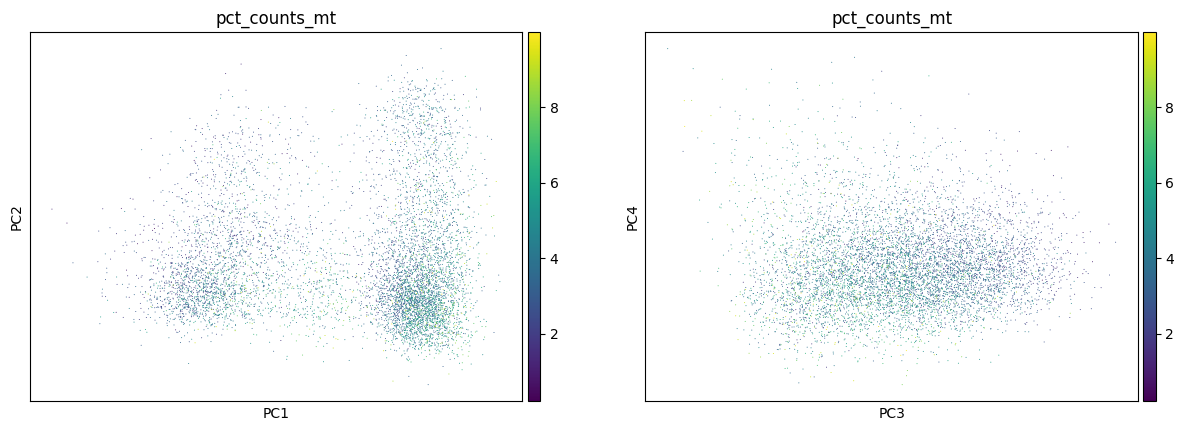

In [33]:
sc.pl.pca(
    adata,
    color=["pct_counts_mt", "pct_counts_mt"],
    dimensions=[ (0, 1), (2, 3)],
    ncols=2,
    size=2,
)

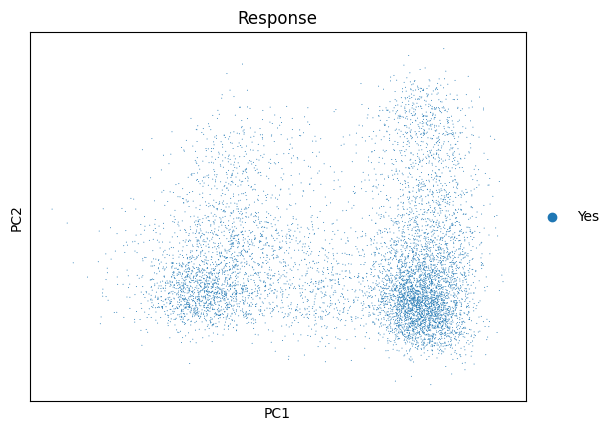

In [35]:
sc.pl.pca(
    adata,
    color=["Response"],
    dimensions=[ (0, 1)],
    ncols=2,
    size=2,
)

In [36]:
sc.pp.neighbors(adata)

2024-08-07 14:57:20.074618: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-07 14:57:21.132828: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [37]:
sc.tl.umap(adata)

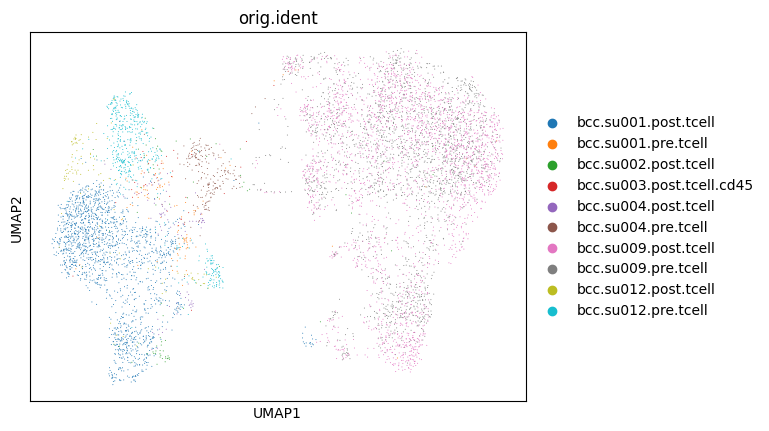

In [40]:
sc.pl.umap(
    adata,
    color="orig.ident",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

In [41]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)

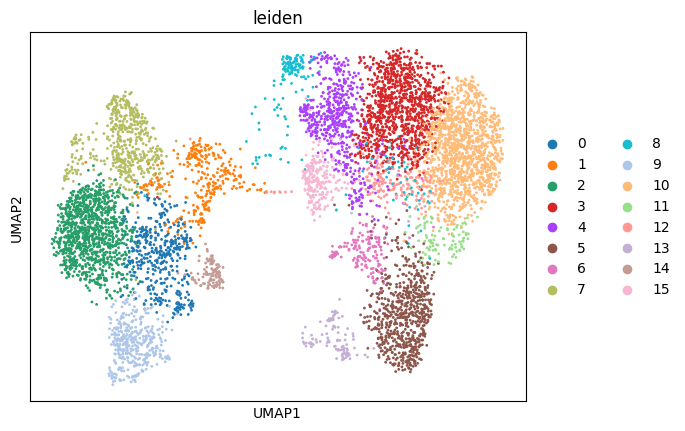

In [42]:
sc.pl.umap(adata, color=["leiden"])

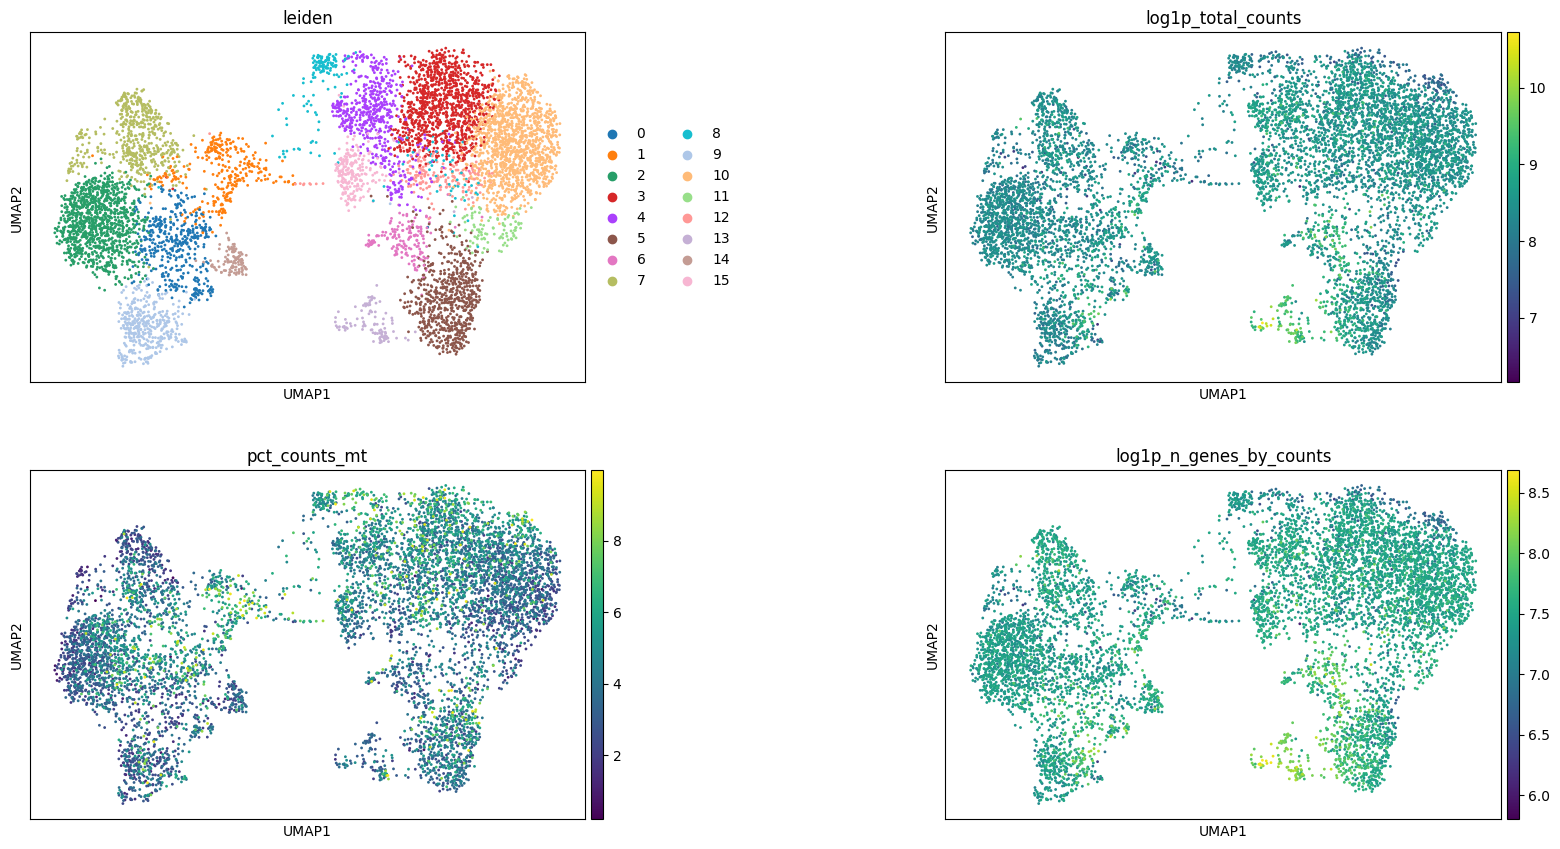

In [43]:
sc.pl.umap(
    adata,
    color=["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace=0.5,
    ncols=2,
)

In [46]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon")

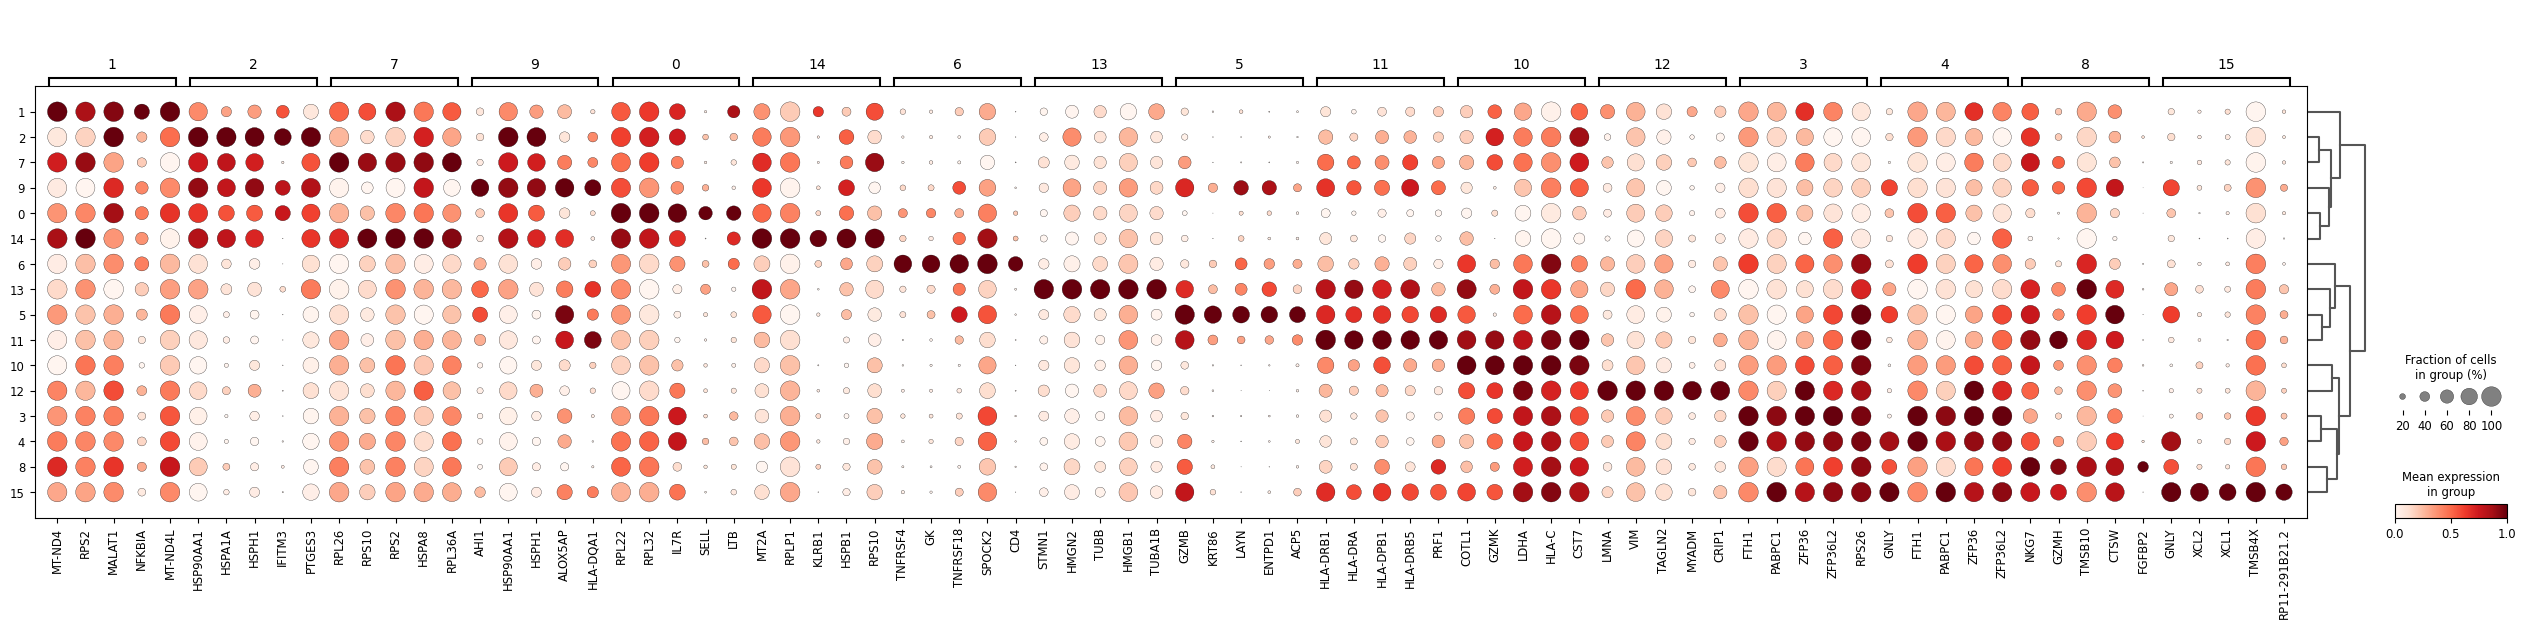

In [47]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden", standard_scale="var", n_genes=5
)

In [50]:
sc.get.rank_genes_groups_df(adata, group="6").head(30)

names     scores  logfoldchanges         pvals     pvals_adj
0      TNFRSF4  17.238171        4.535530  1.373125e-66  2.082756e-62
1           GK  16.519129        3.798238  2.672326e-61  2.026692e-57
2     TNFRSF18  16.324829        3.144946  6.572361e-60  3.322986e-56
3       SPOCK2  14.273518        1.429397  3.200188e-46  9.708091e-43
4          CD4  13.887186        4.998077  7.575384e-44  1.915057e-40
5          B2M  13.671271        0.537732  1.507389e-42  3.266296e-39
6      TMEM173  13.541764        3.724200  8.863434e-42  1.493784e-38
7         TYMP  12.832826        2.308175  1.073757e-37  1.480613e-34
8         BATF  12.097152        2.192177  1.093393e-33  1.275737e-30
9       CARD16  11.857776        2.104352  1.961168e-32  1.859187e-29
10         MAF  11.263844        2.681519  1.979328e-29  1.667914e-26
11       CTLA4  11.201241        2.257939  4.020633e-29  3.209735e-26
12        SNX9  10.600402        1.707086  2.967029e-26  1.875162e-23
13        GPX1  10.426787        1.551716  1.871081e-25  1.051132e-22
14        IL32  10.291325        1.282621  7.710834e-25  4.177069e-22
15      S100A4  10.266740        1.349057  9.951078e-25  5.204757e-22
16      CXCL13  10.194832        3.879592  2.091063e-24  1.057241e-21
17        SAT1  10.188609        1.417876  2.229299e-24  1.090775e-21
18         CD2  10.026108        1.128493  1.170400e-23  5.547697e-21
19     GRAMD1A   9.710523        2.266797  2.719395e-22  1.178508e-19
20      IGFLR1   9.481840        1.876305  2.498383e-21  9.716788e-19
21       CD247   9.462317        1.372297  3.011943e-21  1.087742e-18
22       TSHZ2   9.383596        3.263926  6.375984e-21  2.249091e-18
23        CTSB   9.276277        2.102056  1.755043e-20  5.915664e-18
24       TIGIT   9.229219        1.327124  2.726105e-20  8.989035e-18
25        ICOS   9.181820        2.052354  4.238654e-20  1.367913e-17
26     RNASET2   9.177177        1.805417  4.425397e-20  1.398425e-17
27        LSP1   9.113946        1.302828  7.943882e-20  2.459037e-17
28  AC017002.1   9.049307        3.535605  1.438788e-19  4.364708e-17
29       CXCR6   8.936240        1.606958  4.026355e-19  1.174457e-16

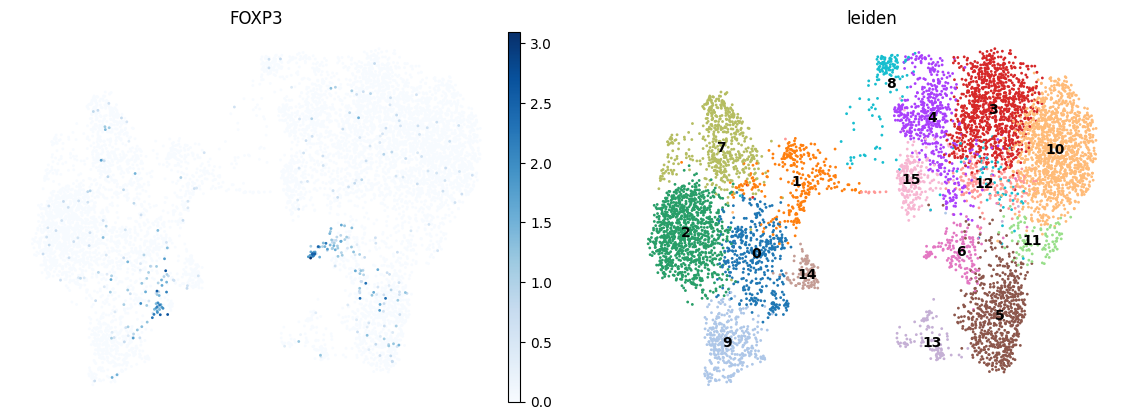

In [63]:

sc.pl.umap(
    adata,
    color=["FOXP3", "leiden"],
    legend_loc="on data",
    frameon=False,
    ncols=3,
    color_map = "Blues",
)

In [68]:
adata2 = adata
sc.external.pp.harmony_integrate(adata2, "orig.ident", basis='X_pca', adjusted_basis='X_pca_harmony')

2024-08-07 15:21:29,758 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-08-07 15:21:32,788 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-08-07 15:21:32,883 - harmonypy - INFO - Iteration 1 of 10
2024-08-07 15:21:34,293 - harmonypy - INFO - Iteration 2 of 10
2024-08-07 15:21:35,653 - harmonypy - INFO - Converged after 2 iterations


In [67]:
pip install harmonypy

Note: you may need to restart the kernel to use updated packages.


In [91]:
adata2.obsm['X_pca'] = adata2.obsm['X_pca_harmony']
sc.pp.neighbors(adata2, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata2)
sc.tl.leiden(adata2, resolution=0.9)

In [70]:
pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


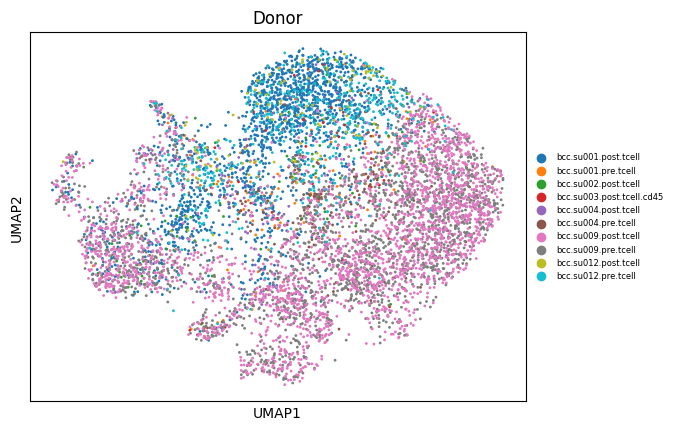

In [92]:
# by sample
donor_umap = sc.pl.umap(adata, color=['orig.ident'],
    show=False, 
legend_fontsize=6, frameon=True, title='Donor')

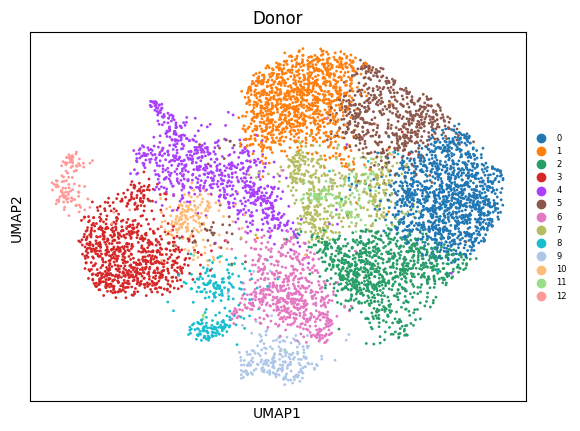

In [97]:
donor_umap = sc.pl.umap(adata2, color=['leiden'],
    show=False,
legend_fontsize=6, frameon=True, title='Donor')

In [99]:
# Obtain cluster-specific differentially expressed genes
sc.tl.rank_genes_groups(adata2, groupby="leiden", method="wilcoxon")

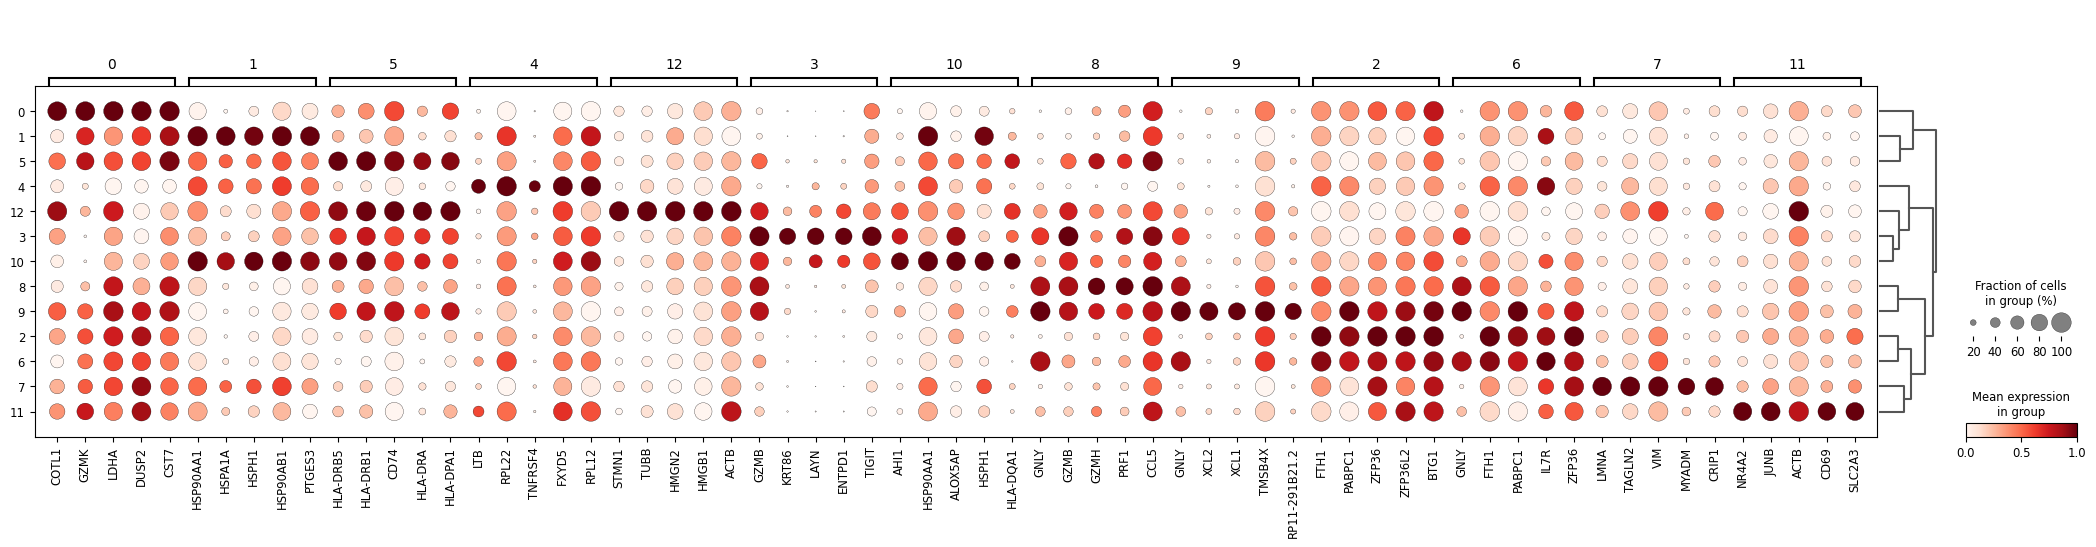

In [100]:
sc.pl.rank_genes_groups_dotplot(
    adata2, groupby="leiden", standard_scale="var", n_genes=5
)

In [98]:
sc.tl.dendrogram(adata2, groupby="leiden")

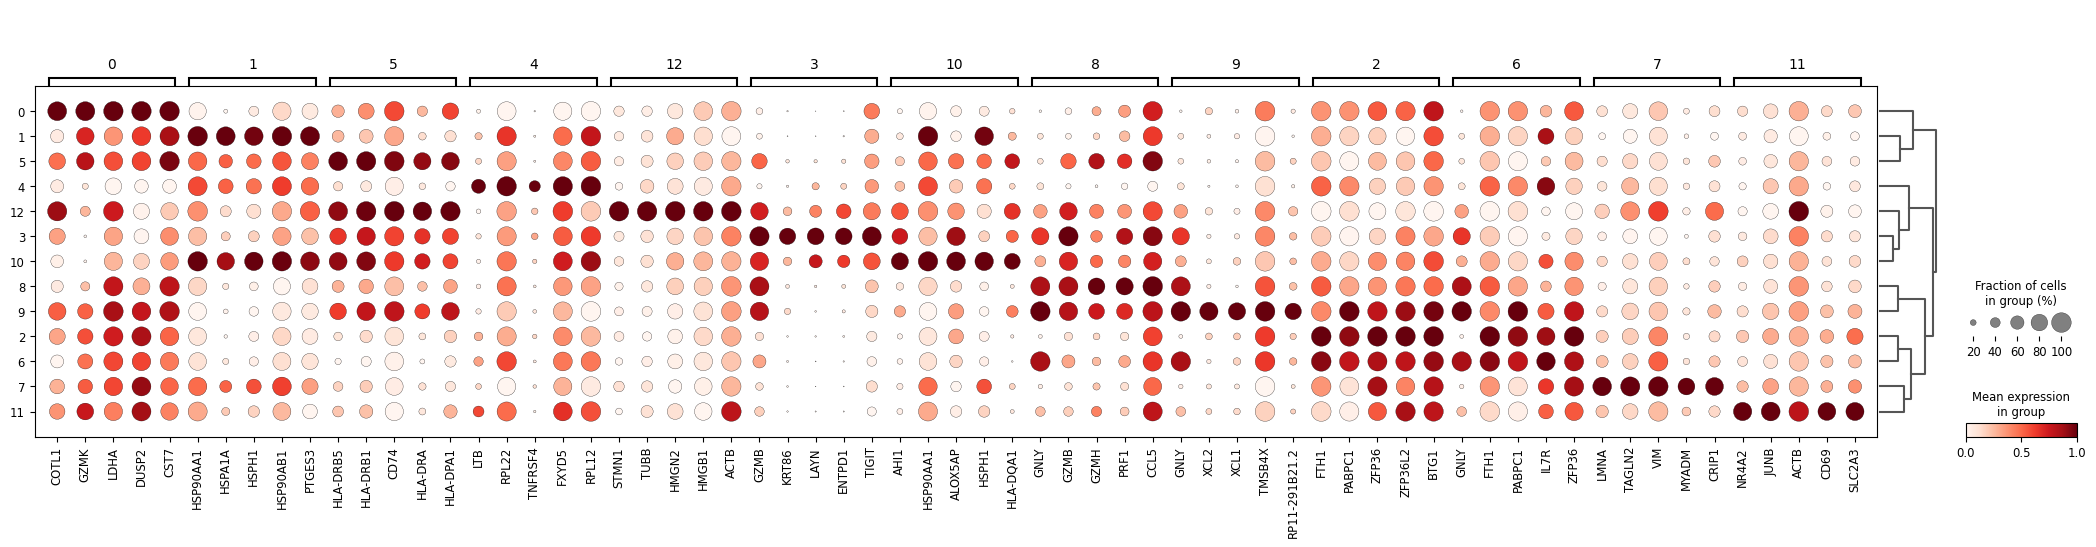

In [101]:
sc.pl.rank_genes_groups_dotplot(
    adata2, groupby="leiden", standard_scale="var", n_genes=5
)

In [142]:
sc.get.rank_genes_groups_df(adata2, group="3").head(20)

names     scores  logfoldchanges          pvals      pvals_adj
0         GZMB  37.486183        3.407797  1.546722e-307  2.346068e-303
1        KRT86  35.012310        5.711017  1.461599e-268  1.108477e-264
2         LAYN  34.932507        4.328600  2.387279e-267  1.207008e-263
3       ENTPD1  34.827469        4.235781  9.339971e-266  3.541717e-262
4        TIGIT  31.070353        2.142646  6.059007e-212  1.312900e-208
5        ITGAE  30.852039        2.453655  5.259582e-209  9.972168e-206
6         LSP1  30.488861        2.184169  3.661191e-204  6.170327e-201
7   AC092580.4  30.483826        2.142353  4.269488e-204  6.475959e-201
8         ACP5  30.262156        4.232121  3.610378e-201  4.978382e-198
9     TNFRSF18  29.901993        3.094841  1.853820e-196  2.343229e-193
10      GALNT2  29.580872        3.172983  2.633427e-192  3.072602e-189
11        JAML  27.718884        2.461813  4.134802e-169  3.919792e-166
12     ALOX5AP  27.708057        1.900821  5.583518e-169  4.981812e-166
13        CTSW  27.599758        1.715072  1.120146e-167  9.439100e-165
14        GNLY  26.729935        3.120840  2.113125e-157  1.602594e-154
15      HAVCR2  26.647999        4.016715  1.887899e-156  1.363602e-153
16       CXCR6  26.320442        2.266111  1.119114e-152  7.072802e-150
17        AHI1  26.130379        2.411684  1.647146e-150  9.993563e-148
18        LAG3  25.557247        2.043552  4.561115e-144  2.470821e-141
19      CXCL13  24.923897        3.684133  4.098437e-137  2.005325e-134

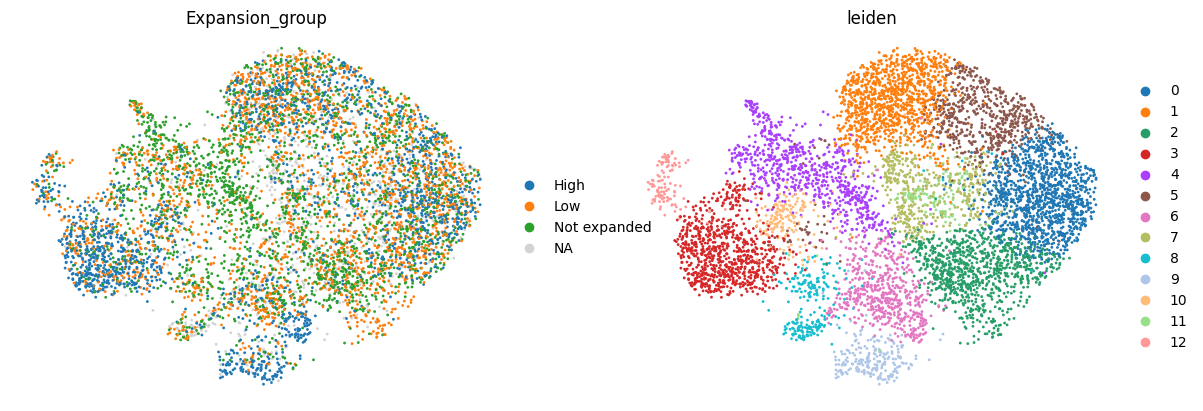

In [103]:
sc.pl.umap(
    adata2,
    color=["Expansion_group", "leiden"],
    legend_loc="right margin",
    frameon=False,
    ncols=3,
    color_map = "Blues",
)

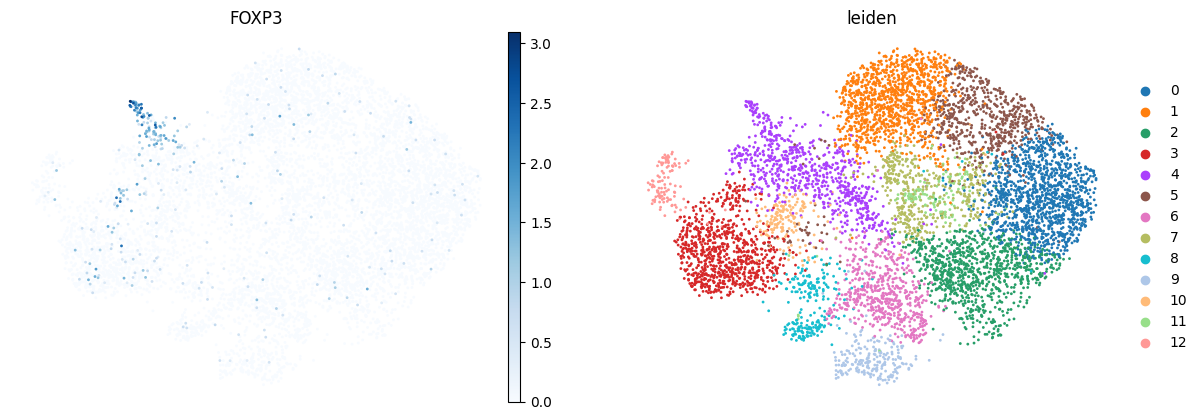

In [104]:
sc.pl.umap(
    adata2,
    color=["FOXP3", "leiden"],
    legend_loc="right margin",
    frameon=False,
    ncols=3,
    color_map = "Blues",
)

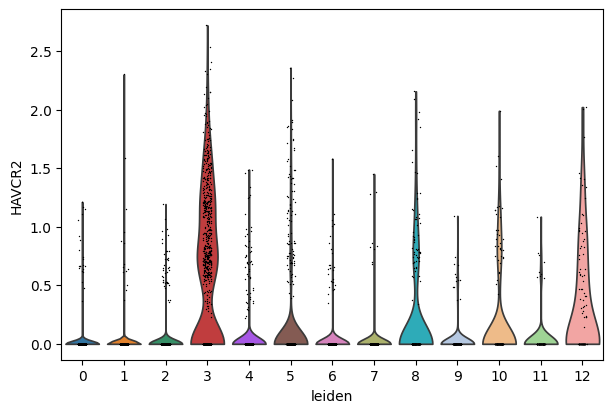

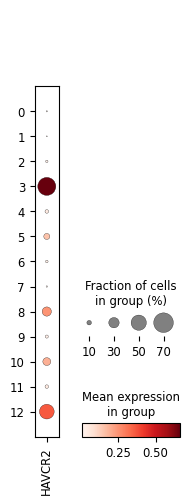

In [136]:
sc.pl.violin(adata2, "HAVCR2", groupby="leiden")
sc.pl.dotplot(adata2, "HAVCR2", groupby="leiden", dot_min = 0)

In [119]:
obs_df = adata2.obs
obs_df

orig.ident  nCount_RNA  \
bcc.su001.pre.tcell_AAACCTGCAGATCGGA    bcc.su001.pre.tcell        3061   
bcc.su001.pre.tcell_AAAGATGAGACAGGCT    bcc.su001.pre.tcell        4519   
bcc.su001.pre.tcell_AAAGCAAAGAGTTGGC    bcc.su001.pre.tcell        2561   
bcc.su001.pre.tcell_AACCATGGTTATCGGT    bcc.su001.pre.tcell        4956   
bcc.su001.pre.tcell_AACTCAGTCTTAGAGC    bcc.su001.pre.tcell        3311   
...                                                     ...         ...   
bcc.su012.post.tcell_TGTGTTTGTAGATTAG  bcc.su012.post.tcell        5282   
bcc.su012.post.tcell_TTAACTCCACAGAGGT  bcc.su012.post.tcell        1793   
bcc.su012.post.tcell_TTCGAAGTCGTTACAG  bcc.su012.post.tcell        4053   
bcc.su012.post.tcell_TTCTCCTGTGGCGAAT  bcc.su012.post.tcell        3357   
bcc.su012.post.tcell_TTTACTGTCTTGCCGT  bcc.su012.post.tcell        3571   

                                       nFeature_RNA patient treatment  \
bcc.su001.pre.tcell_AAACCTGCAGATCGGA           1110   su001       pre   
bcc.su001.pre.tcell_AAAGATGAGACAGGCT           1938   su001       pre   
bcc.su001.pre.tcell_AAAGCAAAGAGTTGGC           1135   su001       pre   
bcc.su001.pre.tcell_AACCATGGTTATCGGT           1536   su001       pre   
bcc.su001.pre.tcell_AACTCAGTCTTAGAGC           1451   su001       pre   
...                                             ...     ...       ...   
bcc.su012.post.tcell_TGTGTTTGTAGATTAG          1785   su012      post   
bcc.su012.post.tcell_TTAACTCCACAGAGGT           860   su012      post   
bcc.su012.post.tcell_TTCGAAGTCGTTACAG          1618   su012      post   
bcc.su012.post.tcell_TTCTCCTGTGGCGAAT          1382   su012      post   
bcc.su012.post.tcell_TTTACTGTCTTGCCGT          1264   su012      post   

                                             sort          cluster     UMAP1  \
bcc.su001.pre.tcell_AAACCTGCAGATCGGA   CD45+ CD3+      CD4_T_cells -4.893518   
bcc.su001.pre.tcell_AAAGATGAGACAGGCT   CD45+ CD3+      CD4_T_cells  1.086987   
bcc.su001.pre.tcell_AAAGCAAAGAGTTGGC   CD45+ CD3+  CD8_mem_T_cells -8.273993   
bcc.su001.pre.tcell_AACCATGGTTATCGGT   CD45+ CD3+  CD8_mem_T_cells -6.569336   
bcc.su001.pre.tcell_AACTCAGTCTTAGAGC   CD45+ CD3+   CD8_ex_T_cells  2.634526   
...                                           ...              ...       ...   
bcc.su012.post.tcell_TGTGTTTGTAGATTAG  CD45+ CD3+  CD8_mem_T_cells -8.300099   
bcc.su012.post.tcell_TTAACTCCACAGAGGT  CD45+ CD3+  CD8_mem_T_cells -7.406570   
bcc.su012.post.tcell_TTCGAAGTCGTTACAG  CD45+ CD3+   CD8_ex_T_cells -0.199053   
bcc.su012.post.tcell_TTCTCCTGTGGCGAAT  CD45+ CD3+  CD8_mem_T_cells -6.662873   
bcc.su012.post.tcell_TTTACTGTCTTGCCGT  CD45+ CD3+  CD8_mem_T_cells -7.912083   

                                          UMAP2 Tumor.Type  ...  \
bcc.su001.pre.tcell_AAACCTGCAGATCGGA   5.544943        BCC  ...   
bcc.su001.pre.tcell_AAAGATGAGACAGGCT   9.563350        BCC  ...   
bcc.su001.pre.tcell_AAAGCAAAGAGTTGGC   3.693397        BCC  ...   
bcc.su001.pre.tcell_AACCATGGTTATCGGT   2.884158        BCC  ...   
bcc.su001.pre.tcell_AACTCAGTCTTAGAGC   1.573781        BCC  ...   
...                                         ...        ...  ...   
bcc.su012.post.tcell_TGTGTTTGTAGATTAG  1.376466        BCC  ...   
bcc.su012.post.tcell_TTAACTCCACAGAGGT  4.834411        BCC  ...   
bcc.su012.post.tcell_TTCGAAGTCGTTACAG  1.287982        BCC  ...   
bcc.su012.post.tcell_TTCTCCTGTGGCGAAT  1.164121        BCC  ...   
bcc.su012.post.tcell_TTTACTGTCTTGCCGT  3.643480        BCC  ...   

                                      log1p_total_counts_mt pct_counts_mt  \
bcc.su001.pre.tcell_AAACCTGCAGATCGGA               5.375278      7.023849   
bcc.su001.pre.tcell_AAAGATGAGACAGGCT               5.283204      4.337243   
bcc.su001.pre.tcell_AAAGCAAAGAGTTGGC               4.820282      4.802812   
bcc.su001.pre.tcell_AACCATGGTTATCGGT               5.283204      3.954802   
bcc.su001.pre.tcell_AACTCAGTCTTAGAGC               5.613128      8.245243   
...                                        

In [137]:
pd.pivot_table(obs_df,  values = "n_genes", index = ("leiden"), aggfunc="count", columns = "Expansion_group", margins_name="Totals", margins=True, dropna=False, fill_value="NA", observed=False)

Expansion_group  High   Low  Not expanded  Totals
leiden                                           
0                 389   400           260    1242
1                 262   399           283    1105
2                 112   334           358     935
3                 465   191           137     819
4                  36   177           486     746
5                 150   223           194     624
6                 156   162           176     582
7                  72   111           113     438
8                  18    73            92     231
9                 124    26            27     216
10                 53    58            42     169
11                 14    36            46     127
12                 45    43            21     109
Totals           1896  2233          2235    7343

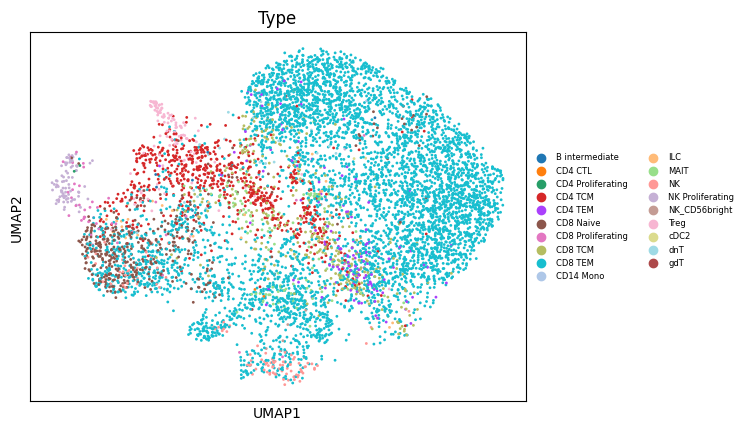

In [138]:
# by sample
donor_umap = sc.pl.umap(adata2, color=['predicted.celltype.l2'],
    show=False,
legend_fontsize=6, frameon=True, title='Type')

In [139]:
pd.pivot_table(obs_df,  values = "n_genes", index = ("leiden"), aggfunc="count", columns = "predicted.celltype.l2", margins_name="Totals", margins=True, dropna=False, fill_value="NA", observed=False)

predicted.celltype.l2  B intermediate  CD4 CTL  CD4 Proliferating  CD4 TCM  \
leiden                                                                       
0                                   0        0                  0        0   
1                                   0        0                  0       11   
2                                   0        0                  0       36   
3                                   0        0                  0       75   
4                                   4        0                  0      434   
5                                   1        0                  0       11   
6                                   0        2                  0        8   
7                                   0        0                  0       86   
8                                   0        0                  0        0   
9                                   0        0                  0        0   
10                                  2        0                  0       22   
11                                  0        0                  0        1   
12                                  0        0                  2        0   
Totals                              7        2                  2      684   

predicted.celltype.l2  CD4 TEM  CD8 Naive  CD8 Proliferating  CD8 TCM  \
leiden                                                                  
0                            3          3                  0        2   
1                           19          0                  0       46   
2                           84          0                  2      148   
3                            0        294                 16        4   
4                            6         17                  1       74   
5                            1         26                  1        0   
6                            6          1                  0       26   
7                           13          2                  1       43   
8                            0         24                  0        2   
9                            0          0                  2        0   
10                           0         31                  2       12   
11                           6          0                  0        0   
12                           0          5                 20        0   
Totals                     138        403                 45      357   

predicted.celltype.l2  CD8 TEM  CD14 Mono  ILC  MAIT   NK  NK Proliferating  \
leiden                                                                        
0                         1234          0    0     0    0                 0   
1                         1011          0    1     5    0                 1   
2                          643          0    2    15    3                 0   
3                          370          0   11     0   33                 0   
4                           52          0    2    49    0                 0   
5                          581          1    0     0    0                 0   
6                          492          0    0    43    0                 0   
7                          272          0    6    11    0                 0   
8                          197          0    0     0    8                 0   
9                          144          0    0     0   67                 0   
10                          90          0    3     0    0                 0   
11                          98          0    1    19    1                 0   
12                           1          0    0     0    0                81   
Totals                    5185          1   26   142  112                82   

predicted.celltype.l2  NK_CD56bright  Treg  cDC2  dnT  gdT  Totals  
leiden                                                              
0                                  0     0     0    0    0    1242  
1                                  0     0     0   11    0    1105  
2                                  0     

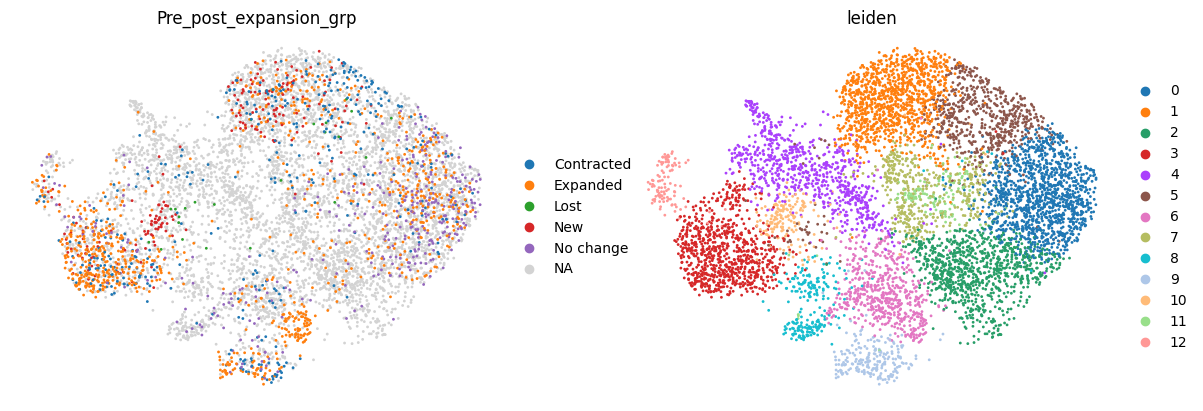

In [140]:
sc.pl.umap(
    adata2,
    color=["Pre_post_expansion_grp", "leiden"],
    legend_loc="right margin",
    frameon=False,
    ncols=3,
    color_map = "Blues",
)

In [141]:
pd.pivot_table(obs_df,  values = "n_genes", index = ("leiden"), aggfunc="count", columns = "Pre_post_expansion_grp", margins_name="Totals", margins=True, dropna=False, fill_value="NA", observed=False)

Pre_post_expansion_grp  Contracted  Expanded  Lost  New  No change  Totals
leiden                                                                    
0                               39       181     1    0        168    1242
1                               65        98     4   95          0    1105
2                                3        57     0    0         52     935
3                               89       295     2   50         29     819
4                               18        11     0    4          3     746
5                               79        35     6   13         17     624
6                               24       102     1    0         29     582
7                               28        24     1    2         17     438
8                                3         2     0    0         13     231
9                               40        65     0    0         19     216
10                               0         6     9   37          1     169
11                               0         7     0    1          6     127
12                               5        28     0    5          7     109
Totals                         393       911    24  207        361    7343